In [1]:
!pip install pandas-datareader


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import yfinance as yf
import datetime as dt

stock = "BTC-USD"
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2025, 10, 30)

df = yf.download(stock, start, end)

C:\Users\hp\AppData\Local\Temp\ipykernel_14300\2541497596.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [23]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
2124,2025-10-25,111641.726562,111947.703125,110704.406250,111032.617188,24707667305
2125,2025-10-26,114472.445312,115260.906250,111268.484375,111639.054688,41708524143
2126,2025-10-27,114119.328125,116273.312500,113882.289062,114479.851562,61761358733
2127,2025-10-28,112956.164062,116078.984375,112291.679688,114129.085938,64528066504
2128,2025-10-29,110055.304688,113642.726562,109368.718750,112921.328125,62192043469


In [24]:
df.shape

(2129, 6)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           2129 non-null   datetime64[ns]
 1   (Close, BTC-USD)   2129 non-null   float64       
 2   (High, BTC-USD)    2129 non-null   float64       
 3   (Low, BTC-USD)     2129 non-null   float64       
 4   (Open, BTC-USD)    2129 non-null   float64       
 5   (Volume, BTC-USD)  2129 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 99.9 KB


In [26]:
df.isnull().sum()

Price   Ticker 
Date               0
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [27]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2129,2129.000000,2129.000000,2129.000000,2129.000000,2.129000e+03
mean,2022-11-30 00:00:00,45837.662496,46699.824328,44843.487908,45791.328178,3.580560e+10
min,2020-01-01 00:00:00,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09
25%,2021-06-16 00:00:00,21502.337891,21789.636719,20950.818359,21401.044922,2.169200e+10
50%,2022-11-30 00:00:00,38688.750000,39776.351562,37585.789062,38605.859375,3.148635e+10
75%,2024-05-15 00:00:00,62901.449219,63872.441406,61184.894531,62891.031250,4.424348e+10
max,2025-10-29 00:00:00,124752.531250,126198.070312,123196.046875,124752.140625,3.509679e+11
std,NaN,30835.032029,31290.576218,30318.113644,30815.376381,2.114338e+10


In [28]:
df = df.reset_index()

In [29]:
df.columns

MultiIndex([( 'index',        ''),
            (  'Date',        ''),
            ( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [31]:
df.to_csv("btc-usd.csv")

In [32]:
data01 = pd.read_csv("btc-usd.csv")

In [33]:
data01.head()

,Price,index,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,NaN,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,0,0.0,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
2,1,1.0,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
3,2,2.0,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032
4,3,3.0,2020-01-04,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275


In [42]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [48]:
df = df.drop(columns=['Date', 'index', 'Adj Close'], level=0, errors='ignore')

In [49]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


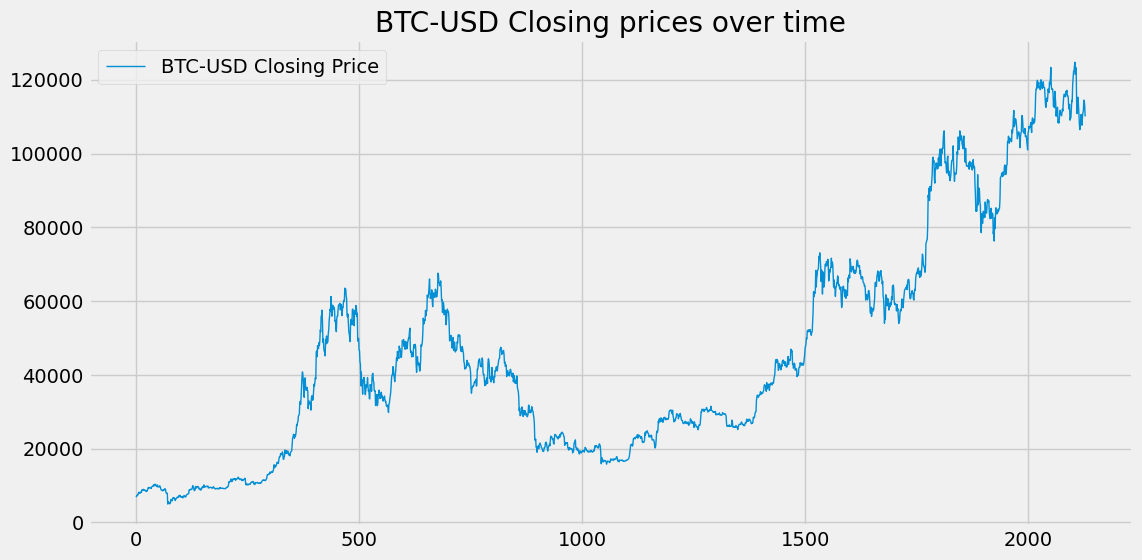

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

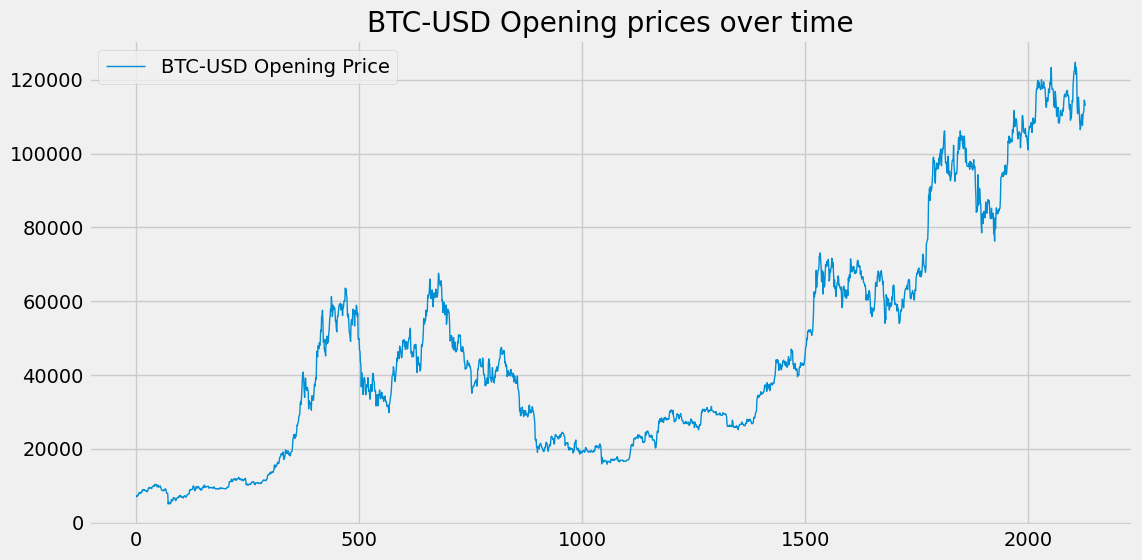

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

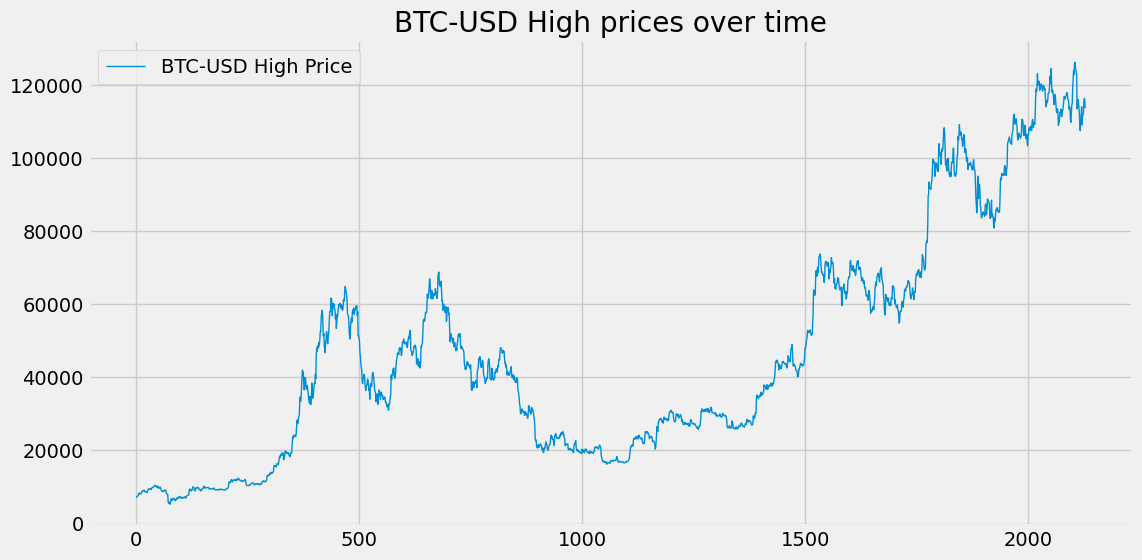

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

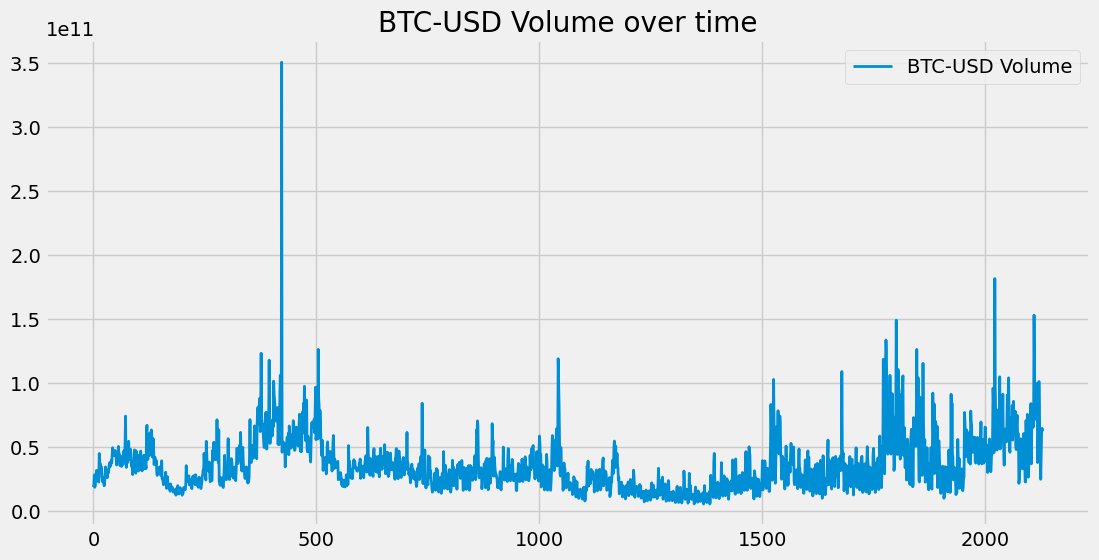

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [54]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [55]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [56]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


## Moving Average

In [57]:
ma100 = df.Close.rolling(100).mean()

In [58]:
ma100

Ticker,BTC-USD
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2124,114745.276719
2125,114709.968906
2126,114671.762422
2127,114628.316172


In [59]:
ma200 = df.Close.rolling(200).mean()

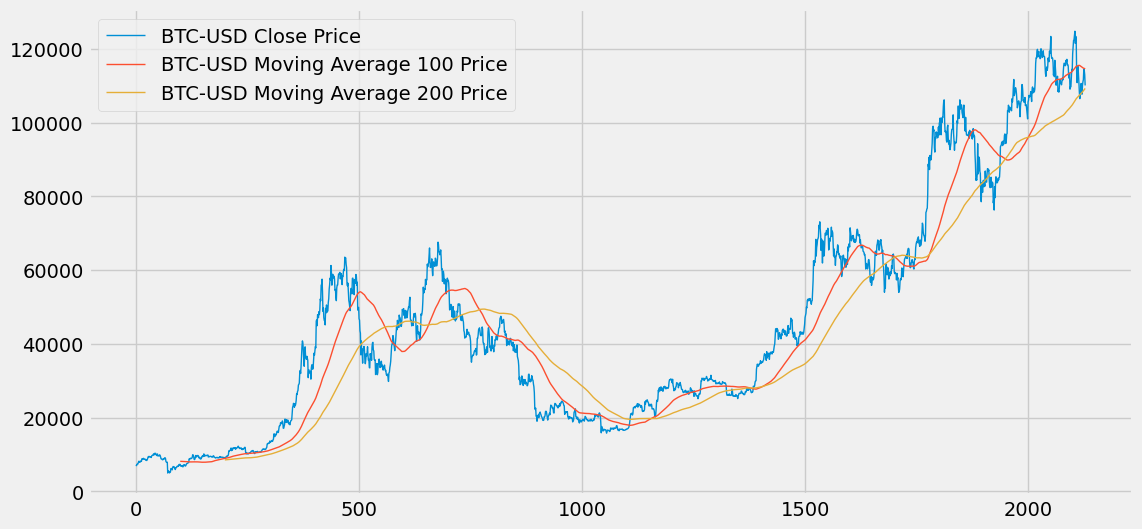

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

## Exp. Moving Average

In [61]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [62]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

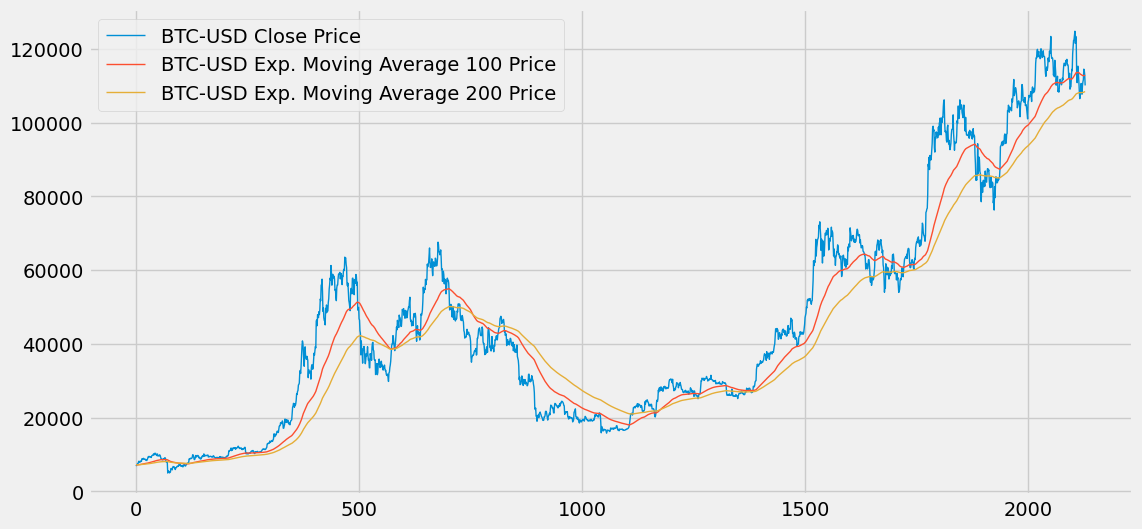

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [64]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [65]:
data_training.shape

(1490, 1)

In [66]:
data_testing.shape

(639, 1)

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [68]:
data_training_array = scaler.fit_transform(data_training)

In [69]:
data_training_array

array([[0.03561545],
       [0.03218546],
       [0.03792726],
       ...,
       [0.59347631],
       [0.592127  ],
       [0.61213869]])

In [70]:
data_training_array.shape[0]

1490

In [72]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [73]:
x_train.shape

(1390, 100, 1)

In [74]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [75]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [76]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 168ms/step - loss: 0.0881
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - loss: 0.0121
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - loss: 0.0125
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - loss: 0.0102
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 0.0089
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 0.0080
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - loss: 0.0078
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - loss: 0.0079
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 0.0086
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - loss: 0.0078
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - loss: 0.0077
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - loss: 0.0069
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 0.0061
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - loss: 0.0064
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/st

In [78]:
past_100_days = data_training.tail(100)

In [83]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [84]:
final_df.head()

Ticker,BTC-USD
0,29993.896484
1,33086.234375
2,33901.527344
3,34502.820312
4,34156.648438


In [85]:
input_data = scaler.fit_transform(final_df)

In [86]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [87]:
x_test.shape

(639, 100, 1)

In [88]:
y_predicted = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 180ms/step


In [89]:
scaler.scale_

array([1.0553128e-05])

In [90]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

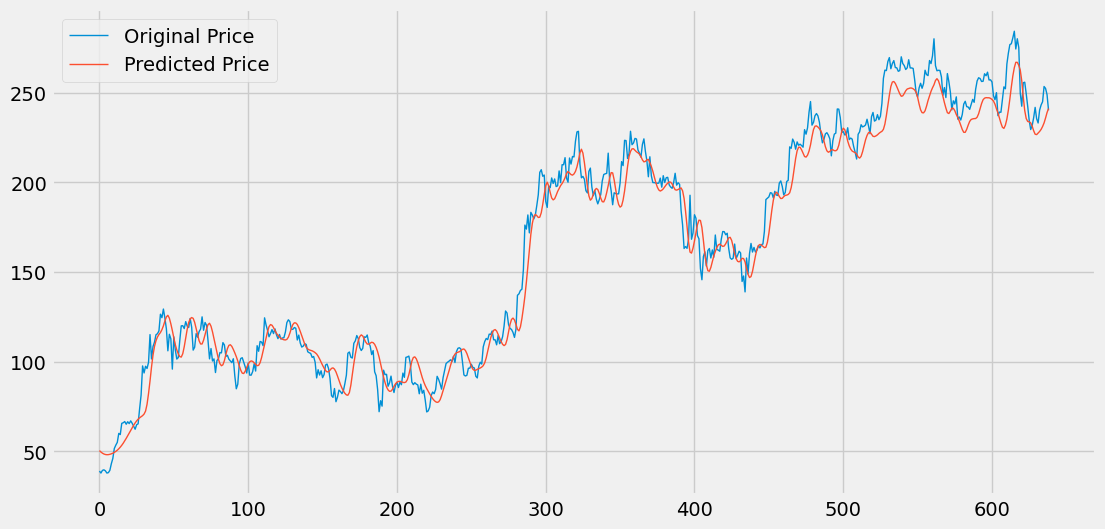

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [92]:
model.save('stock_dl_model.h5')